# Assessment: Weekly deliverable template - Final project
<font color='#AC135A'>**Applied Machine Learning** - **Sheffield Hallam University**</font>


---

## Introduction
Add your solutions to the different sub-tasks requested for this deliverable.

<font color='red'>DO NOT ADD MORE CELLS TO THE FINAL VERSION OF THIS NOTEBOOK.

### 1. Dataset loading

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

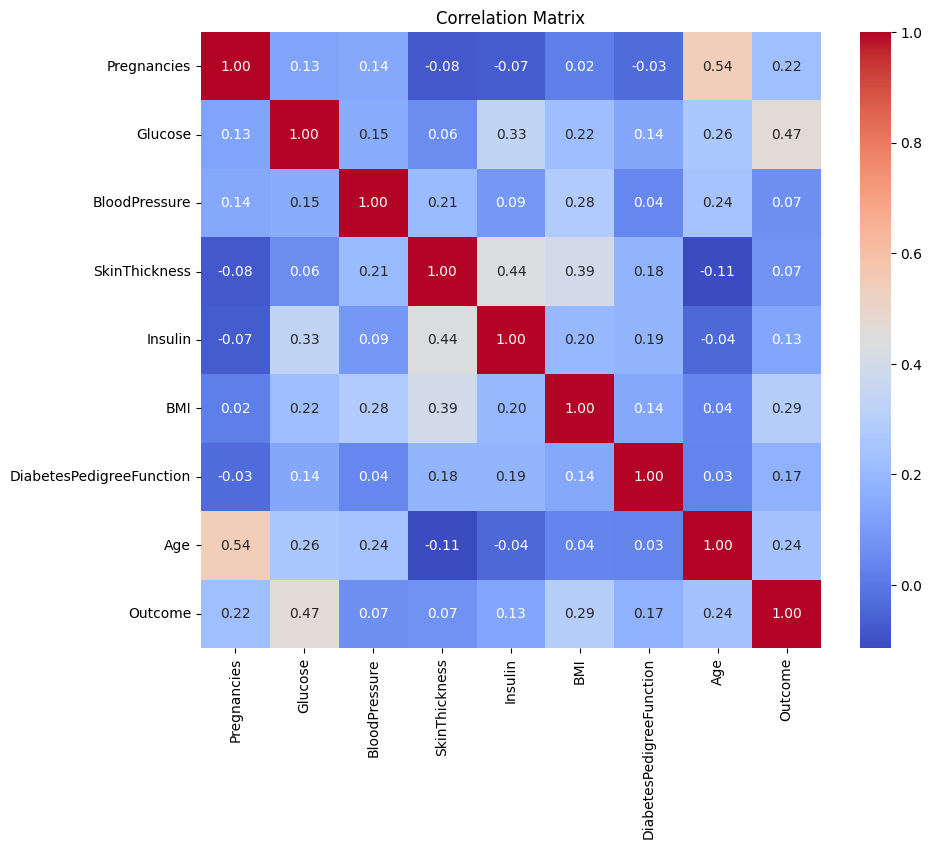

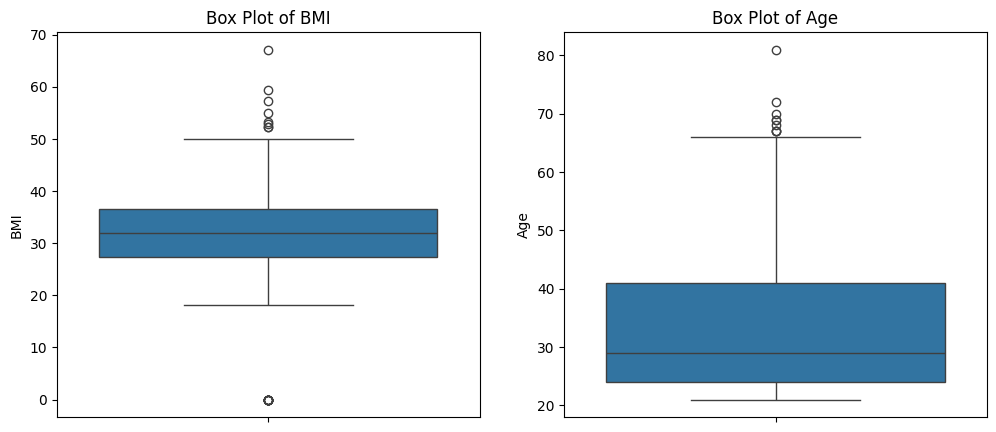

In [33]:
import pandas as pd

df = pd.read_csv('Pima Indians Diabetes Database.csv')

# Display the first few rows of the dataframe
print(df.head())
print(df.describe())

# show all examples with any missing values
print("\nShow counts of missing values in each column:")
print(df.isnull().sum())

import seaborn as sns  
import matplotlib.pyplot as plt 
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot box plots fpr BMI and Age
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['BMI'])
plt.title('Box Plot of BMI')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')
plt.show()

**Observations:**  

All data are numeric, and there are no NaN values. 

*Outcome* is our binary categorical target variable. In order to find a good predictor, I check for the best correlations in the correlation matrix.

By far the best correlation is by *Glucose* with 0.47. So ideally I would predict the diabetes risk based on that variable. However, Glucose is not suitable for the workplace as it requires some medical testing.

The next best variable is *BMI* with a 0.29 correlation to *Outcome*. This is a suitable variable as it is neither invasive, nor is it unfair. It is just an observation. So I will include BMI in my feature set. The interquartile range (IQR) for *BMI* is 9.3 (36.6–27.3), so the cut offs for outliers are 27.3–1.5\*9.3=13.35 (notably there are examples with a BMI of 0, which points to missing data), and 36.6+1.5\*9.3=50.55, respectively. 

Also *Age* has some degree of correlation with'BMI' at 0.24. It is also a fair and not invasive variable. It has a very low correlation with *BMI*, which means this variable may provide some valuable information. I will include *Age* in the feature set. The interquartile range (IQR) for *Age* is 17 (41–24), so the cut offs for outliers are 24–1.5\*17 (below 0, hence no outliers on the lower end), and 41+1.5\*17=66.5. So all ages above 66 can be considered outliers for the purpose of this dataset. Depending on the age structure of the workplace where the model will be deployed, this may be something to keep in mind. I will remove the examples with *Age* > 66 for this assessment.

*Pregnancies* has a similar correlation with *Outcome* as *Age*. However, *Pregancies* only applies to females, and it may be a sensitive question to ask in the workplace, hence I will not make use of this variable. There is also a relatively high correlation with *Age* at 0.54 which may indicate that the informational content of *Pregancies* is in part included in the *Age* variable. 

All other variables except for *BloodPressure* require medical testing or are complex, so not suitable for the workplace. For *BloodPressure*, the correlation with *Outcome* is very low however at 0.07, while there are much higher correlations with *Age* and *BMI*, so I decide to not use Glucose as a feature. This also helps to keep the model simple. 

Having decided on Age and BMI as features, I use Box Plots to visualise outliers. I can see that there are entries with BMI=0, which means the values are missing. I need to remove these examples as they would skew the model, and they do not represent the reality (the BMI is not actually 0). There some outliers with very high BMI values. I do not need to remove them as while they may be extreme, they may also be realistic. There is one very high BMI value at just below 70 which I will remove for the purpose of achieving a better distribution, which should increase the model quality.

As for Age, the outlier range starts above the mid 60s. Again, as they may be reasonable data, I do not technically have to remove them. That said, I will remove the one outlier with an age at around 80 as for an employee targeted model this data point is likely not contructive. 

As I will not use any of the other variables, I am not reviewing them. 

I will not look for duplicates in this dataset, as I do not have a way of determining whether examples with the same Age, BMI and Outcome are taken from the same people or not. Also, in particular for Logistic Regression, any duplicate examples should not influence the model in a significant way. 

### 2. Correlation heat-map and redundant features noted, Outlier treatment




Count of examples with BMI of 0:
11

Dataframe description after cleaning:
              BMI         Age     Outcome
count  755.000000  755.000000  755.000000
mean    32.420265   33.227815    0.350993
std      6.814147   11.580466    0.477597
min     18.200000   21.000000    0.000000
25%     27.500000   24.000000    0.000000
50%     32.300000   29.000000    0.000000
75%     36.600000   41.000000    1.000000
max     59.400000   72.000000    1.000000


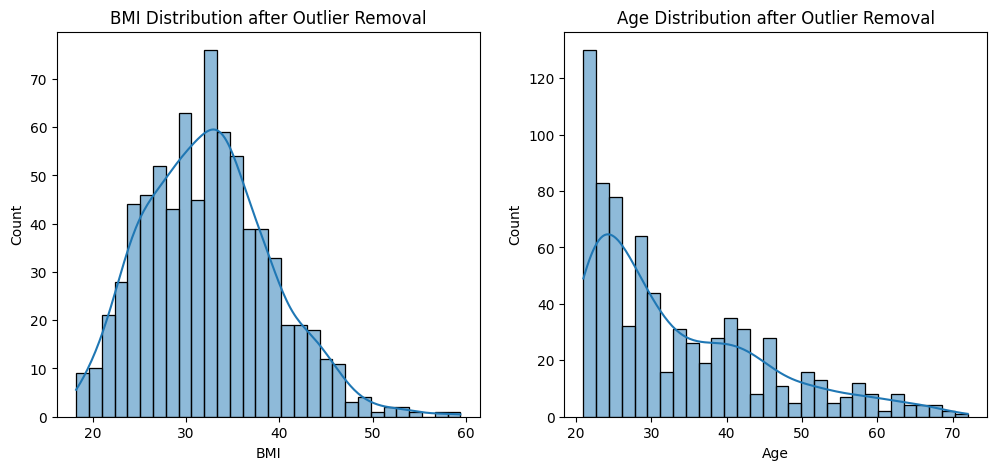

In [34]:
# Remove all columns from df except for 'BMI', 'Age' and 'Outcome'
df = df[['BMI', 'Age', 'Outcome']]

# Show how many examples have a BMI of 0
print("\nCount of examples with BMI of 0:")
print((df['BMI'] == 0).sum())

# Drop rows with BMI of 0
df = df[df['BMI'] != 0]
# Drop the outlier with BMI above 65
df = df[df['BMI'] < 65]
# Remove age outlier above 75
df = df[df['Age'] < 75]  
# Describe the dataframe again
print("\nDataframe description after cleaning:")
print(df.describe())

# Plot histograms of 'BMI' and 'Age' after removing outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('BMI Distribution after Outlier Removal')
plt.subplot(1, 2, 2)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution after Outlier Removal')
plt.show()

**Observations:**  

As discussed in the previous section, I remove the examples with BMI=0, and the very extreme upper outliers for both BMI and Age.

As a result the distribution of BMI is good with a clear single peak. There is moderate variance, with STD/Mean at about 21%. This means there is good information in this variable, neither to concentrated on a few values (in which case there would be no information), nor spread out evenly – in which case it would possibly add more noise than value to the model. 

 *Age* is right skewed. This may be a problem if we see that the higher ages have higher residuals, in which case we may need to balance the dataset to ensure equal weights (cf. Raschka et al. (2022). Machine Learning with Python and Scikit-Learn. Packt Publishing. p. 201ff.) 

### 3. Feature distributions

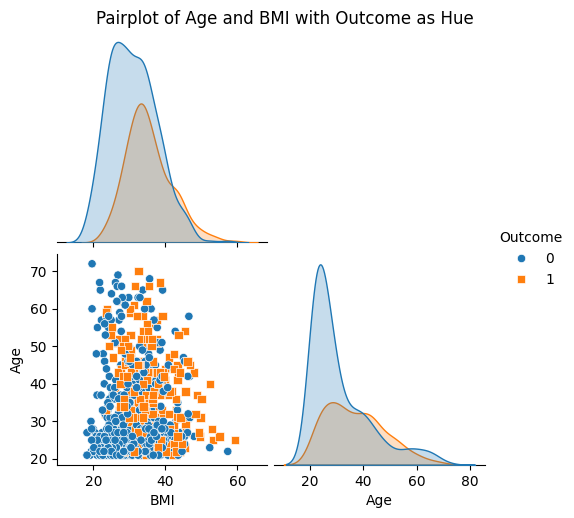

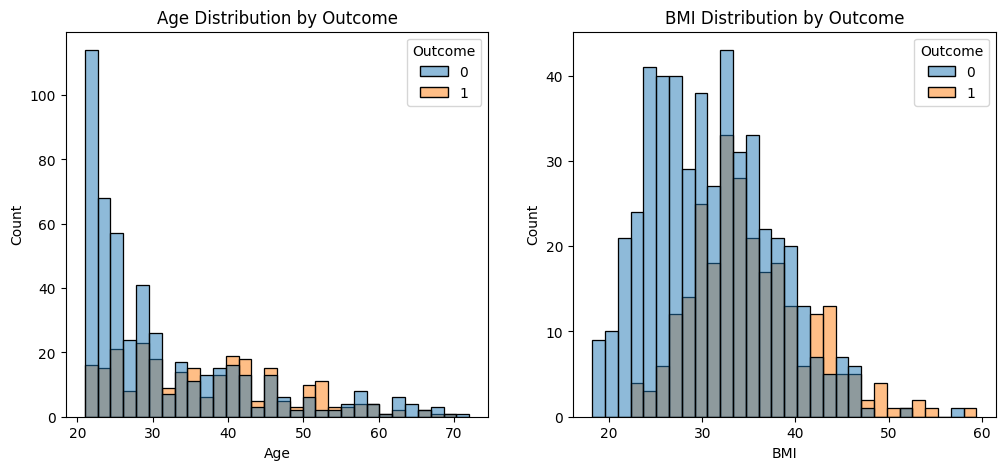

In [35]:
# Show a pairplot with density curves for 'Age' and 'BMI' with Outcome as hue
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], corner=True)
plt.suptitle('Pairplot of Age and BMI with Outcome as Hue', y=1.02)
plt.show()  

# Showing a histogram of the 'Age' and 'BMI' column with Outcome as hue
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Outcome', bins=30, kde=False)
plt.title('Age Distribution by Outcome')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='BMI', hue='Outcome', bins=30, kde=False)
plt.title('BMI Distribution by Outcome')
plt.show()




**Observations:**  

Having already shown the correlation matrix and discussed features in 1., I analyse how the selected features relate to *Outcome*. 

The KDE lines in the pairplot show that there is poor class separation. While the location of *Outcome* for both *Age* and *BMI* is shifted slightly towards higher values (hence the observed correlations), the diabetes peaks are "included" in the non-diabetes peaks. 

This is also reflected in the histogram plots. They show that the relationship betwen *Outcome* and *Age* and *BMI* respectively is of a similar kind. It shows more the *absence* of diabetes in people with low BMI, and the relativey low chance of diabetes in people of a young age. The opposite is not true: a high BMI does not necessarily mean the presence of diabetes, and also older age does not necessarily mean a high risk of diabetes. 

For our model this may mean that it will be difficult to predict diabetes with any certainty. It will be much easier to predict the absence of diabetes with a good accuracy. In other words, any good recall on diabetes (which we have to aim for) will come with relatively poor precision. 

### 4. ≥ 3 models trained and compared (Precision, Recall, AUC)


Best models after hyperparameter tuning:
logreg: LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')
svm: SVC(C=1, class_weight='balanced', probability=True)
rf: RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5)

Precision-Recall vs. Threshold for logreg:


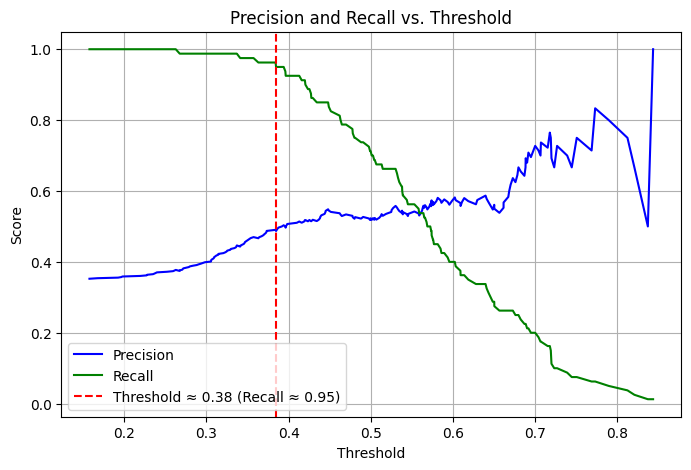


Precision-Recall vs. Threshold for svm:


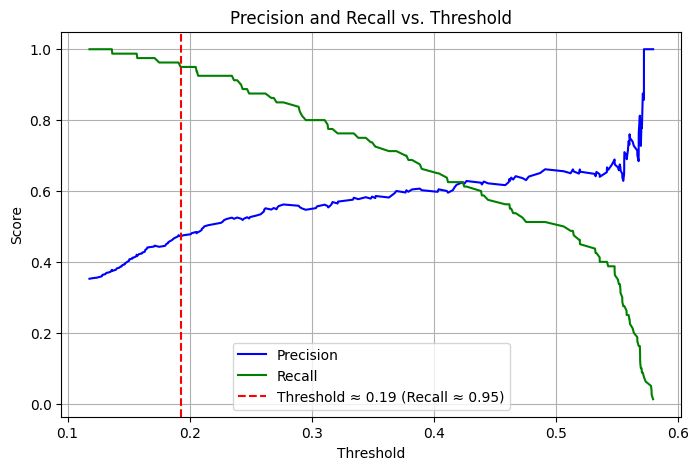


Precision-Recall vs. Threshold for rf:


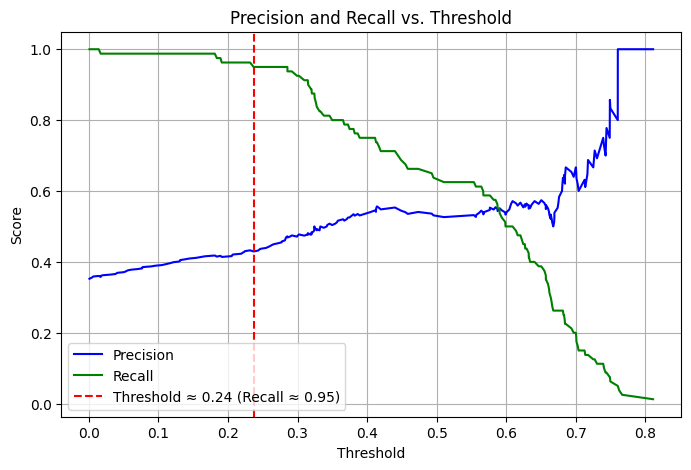


Model Evaluation Results at Target Recall:
    Model  Threshold  Precision  Recall  AUC-ROC
0  logreg   0.384715      0.487    0.95    0.762
1     svm   0.192617      0.472    0.95    0.798
2      rf   0.236843      0.429    0.95    0.745


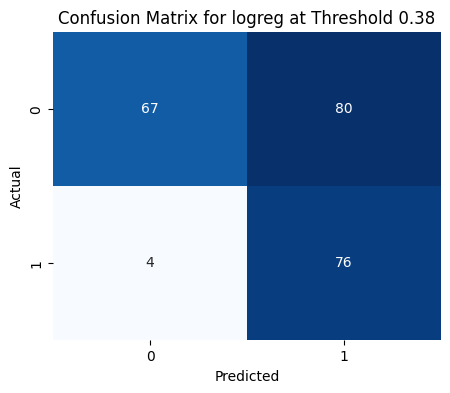

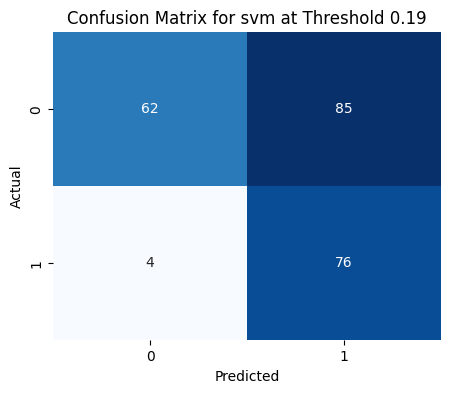

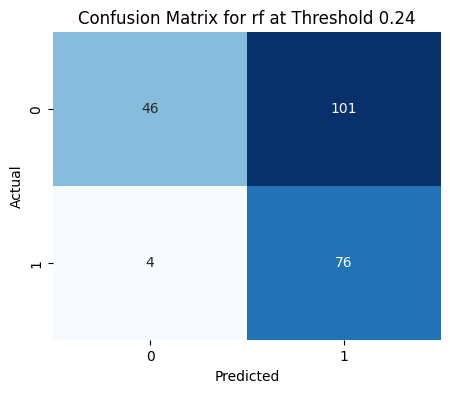

In [36]:
# Looking at the dataset, and the fact that we have a binary classification problem and only two features, I will use a logistic regression model.
# I will also analyse a random forest classifier for comparison. I feel a single decision tree may not give enough flexibility to increase recall. 
# Finally, I will also test SVM as I know that my data are not well separated, and SVMs can work well in such cases, in particular with a kernel.

# The aim for this model must be to have a high recall, i.e. to identify as many diabetes cases as possible. I will use F2-score as the scoring metric, 
# which weighs recall higher than precision.
# The best model will be the one with the highest precision at a given recall, which I arbitrarily set at 95%. 

# So I will test several parameters and models, and then plot precision-recall curves to find the best model.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], stratify=df['Outcome'], test_size=0.3, random_state=1)

# Scaler for LR and SVM (no scaling needed for RF)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define parameter grids for each model
param_grids = {
    'logreg': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'class_weight': [None, 'balanced']
        }
    },
    'svm': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto'],
            'class_weight': [None, 'balanced']
        }
    },
    'rf': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'class_weight': [None, 'balanced']
        }
    }
}


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# Choose F2 as scoring metric
fbeta = make_scorer(fbeta_score, beta=2)  

best_models = {}

# Perform grid search for each model to find the best parameter combination
for name, config in param_grids.items(): 
    # Choose scaled or unscaled input
    X_train_input = X_train_scaled if name in ['logreg', 'svm'] else X_train

    grid = GridSearchCV(config['model'], config['params'], scoring=fbeta, cv=5, n_jobs=-1)
    grid.fit(X_train_input, y_train)

    best_models[name] = grid.best_estimator_

models = {
    'logreg': best_models['logreg'],
    'svm': best_models['svm'],
    'rf': best_models['rf']
}
print("Best models after hyperparameter tuning:")
for name, model in models.items():
    print(f"{name}: {model}")

# As the goal is to have a high recall with the best possible precision, 
# I will plot recall vs. threshold plots to determine the best threshold for each model.
# Plot a graph that shows the threshold on the x axis and the recall and precision on the y axis
import numpy as np
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(y, y_probs):
    precision, recall, thresholds = precision_recall_curve(y, y_probs)
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precision[:-1], label='Precision', color='b')
    plt.plot(thresholds, recall[:-1], label='Recall', color='g')
    # Find threshold for recall of 0.95 and draw a line there
    target_recall = 0.95 # arbitrary choice
    idx = np.argmin(np.abs(recall - target_recall))
    threshold_at_target_recall = thresholds[idx]
    plt.axvline(x=threshold_at_target_recall, color='r', linestyle='--',
            label=f'Threshold ≈ {threshold_at_target_recall:.2f} (Recall ≈ {recall[idx]:.2f})')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision and Recall vs. Threshold')
    plt.legend()
    plt.grid()
    plt.show()
    return threshold_at_target_recall

threshold_at_target_recall = {}

for model in models:
    print(f"\nPrecision-Recall vs. Threshold for {model}:")
    X_eval = X_test if model == 'rf' else X_test_scaled
    y_probs = models[model].predict_proba(X_eval)[:, 1]
    threshold_at_target_recall[model] = plot_precision_recall_vs_threshold(y_test, y_probs)


# Evaluate each model at the threshold that gives a recall of 0.95
results = []
from sklearn.metrics import precision_score, recall_score, roc_auc_score

for name, model in models.items():
    # Choose scaled or unscaled input depending on model type
    X_eval = X_test if (name == 'rf') else X_test_scaled
    
    # Predict probabilities and evaluate at the chosen threshold (where recall =0.95)
    y_proba = model.predict_proba(X_eval)[:, 1]
    y_pred = (y_proba >= threshold_at_target_recall[name]).astype(int)

    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) # should be close to 0.95
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Threshold': threshold_at_target_recall[name],
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'AUC-ROC': round(auc, 3)
    })
print("\nModel Evaluation Results at Target Recall:")
results_df = pd.DataFrame(results)
print(results_df)

# Now print confusion matrices for each model at the chosen threshold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
for name, model in models.items():
    # Choose scaled or unscaled input depending on model type
    X_eval = X_test if (name == 'rf') else X_test_scaled
    
    # Predict probabilities and evaluate at the chosen threshold (where recall =0.95)
    y_proba = model.predict_proba(X_eval)[:, 1]
    y_pred = (y_proba >= threshold_at_target_recall[name]).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name} at Threshold {threshold_at_target_recall[name]:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


**Observations:**  

Even though the various models show very different recall vs threshold curves, at our target recall of 95% all three behave very similarly, with almost neglectable differences. Precision (we want to optimise precision at the same high recall) is slightly higher in the Random Forest model (2 false positives less in the confusion matrix). AUC-ROC is highest in the SVM model.

### 5. Best model choice justified on accuracy and interpretability


In [37]:
# No code required

**Observations:**  

From the accuracy perspective the Random Forest model would be the better choice as it produces slightly less false positives. That said, precision is not great anyway, and any deployment needs to go along communication that there will be a lot of false positives, and that the goal is to catch as many employees with diabetes as possible. With that out of the way, all three models behave practically the same, and the interpretability aspect becomes the most important factor for model choice. 

For interpretability, logistic regression is best. It is intuitive to explain that the model works based on evidence that the lower the BMI and the lower the age, the lower the chance of diabetes (this was shown above), which is essentially how this model works. 

Both SVM and Random Forest are not easy to explain as the concepts are more abstract (SVM), or the model is more complex, because it is an ensemble (RF). In both cases local cases would be much more difficult to explain.

### 6. Three local - case explanations with narrative


Feature importance based on model coefficients:
  feature  coefficient  percent_contribution
0     BMI     0.569964             55.180756
1     Age     0.462939             44.819244

Local explanations for 3 random test instances:
  feature  value  contribution
0     BMI   30.1     -0.212938
1     Age   23.0     -0.411887
Predicted probability: 0.349
Predicted class (threshold 0.38): 0

  feature  value  contribution
0     BMI   32.0     -0.057849
1     Age   42.0      0.354869
Predicted probability: 0.574
Predicted class (threshold 0.38): 1

  feature  value  contribution
0     BMI   33.6      0.072752
1     Age   23.0     -0.411887
Predicted probability: 0.416
Predicted class (threshold 0.38): 1



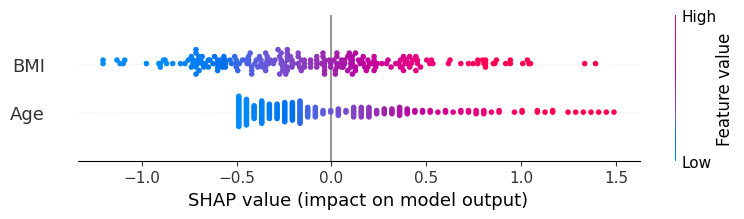

/Users/jus/Documents/Code/ML_Uni_Notebooks/.venv11/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/jus/Documents/Code/ML_Uni_Notebooks/.venv11/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/jus/Documents/Code/ML_Uni_Notebooks/.venv11/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

[('BMI <= 27.60', -0.3648858175127636), ('Age <= 24.00', -0.19770715317034077)]


In [38]:

logreg_model = models['logreg']
threshold = threshold_at_target_recall['logreg']
# Get model coefficients and intercept
coefs = logreg_model.coef_[0]      
intercept = logreg_model.intercept_[0]

# Calculate the contributions per feature as a percentage of the total absolute contribution
abs_coefs = np.abs(coefs)
percent_contrib = 100 * abs_coefs / abs_coefs.sum()
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'coefficient': coefs,
    'percent_contribution': percent_contrib
}).sort_values('percent_contribution', ascending=False)

print("\nFeature importance based on model coefficients:")
print(importance_df.head(10))
print()

print("Local explanations for 3 random test instances:")
# reset the index of the scalesd test set to match the unscaled test set
X_test_reset = X_test.reset_index(drop=True)
X_test_scaled = scaler.transform(X_test_reset)

# pick 3 random samples
for idx, instance in X_test_reset.sample(3, random_state=1).iterrows():
    instance_scaled = X_test_scaled[idx]    

    # Compute contributions
    contributions = coefs * instance_scaled
    logit = np.dot(coefs, instance_scaled) + intercept
    # Compute probability using the logistic function
    prob = 1 / (1 + np.exp(-logit))

    # Wrap results in a DataFrame for readability
    explanation = pd.DataFrame({
        'feature': instance.index,
        'value': instance.values,
        'contribution': contributions
    })

    print(explanation)
    print(f"Predicted probability: {prob:.3f}")
    print(f"Predicted class (threshold {threshold:.2f}): {1 if prob >= threshold  else 0}\n")


# Also trying out SHAP
import shap
# Create a SHAP explainer
explainer = shap.Explainer(logreg_model, X_train_scaled)
# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)
# Plot summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)    

    
# Now also trying LIME for local example explanation

import lime
import lime.lime_tabular


# Convert to NumPy array if needed
X_test_array = X_test_scaled.values if hasattr(X_test_scaled, 'values') else X_test_scaled

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,   # training data only, as array
    feature_names=X_train.columns.tolist(),
    class_names=['No Diabetes', 'Possibly Diabetes'],  # or whatever your classes are
    mode='classification'
)

# Pick one sample to explain (e.g., first test sample)
i = 0
data_row = pd.Series(X_test_array[i], index=X_test.columns)
exp = explainer.explain_instance(
    data_row=data_row,
    predict_fn=model.predict_proba  # pass a function that returns class probabilities
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Or print explanation
print(exp.as_list())





**Observations:**  

First I calculated the feature contributions based on the coefficients. I can do that because I used scaled data for fitting. The result shows that *BMI* contributes slightly more to the prediction than *Age*. That is in line with the correlation matrix in the first section that shows a slightly higher correlation of *BMI* with *Outcome* than *Age* with *Outcome*. It shows also that both features do add information, which again confirms the finding from the correlation matrix that showed a low correlation between *BMI* and *Age* of 0.04.

To explain local examples, I calculate the contributions of each feature. As the data are scaled, the contribution do not say very much on their own, but make sense when seen in comparison: The higher the *Age*, the higher the contribution to the overall predicted probability, and also the higher the *BMI*, the higher the contribution. And the higher the contributions, the higher the probability of being classified positive.

In the first example, both *Age* and *BMI* are contributing negatively, with *Age* the more impactful feature. As an age of 22 is a very low age in the context of the dataset, and a BMI of below 30 also low in that context, and we know that on the lower end of both Age and BMI the risk for diabetes is low, this makes very much sense. 

In the second and third examples, *BMI* reduces the score (still in the "moderate" range of around 30), while *Age* increases it by quite a bit more. So the reason behind the positive classification is clearly *Age*. We know from the histograms and KDE plots that from an age of 35 onwards the likelihood of having diabetes increases a lot in the given dataset. So these number also make sense. 

The SHAP plot visualises the finding: *BMI* is more influential than *Age* (as it is on top). Higher *BMI*/*Age* values (red) increase the outcome probability as they have positive SHAP values. 

The LIME visualisation shows a negative example with the same kind of values as in the manual example.  


### 7. Fairness table across BMI/age groups

In [39]:
from sklearn.metrics import accuracy_score, f1_score #, confusion_matrix
# Predict results for the scaled test data with logistic regression at the 95% recall threshold
y_pred_custom_lr = (logreg_model.predict_proba(X_test_scaled)[:, 1] >= threshold_at_target_recall['logreg']).astype(int)
# Convert both the true labels and predictions to pandas Series with the same index as X_test (same index as X_test_scaled)
y_test = pd.Series(y_test, index=X_test.index)
y_pred_custom_lr = pd.Series(y_pred_custom_lr, index=X_test.index)

# Create 3 bins for age: Young, Middle-aged, Old based on the quantiles of the training dataset
age_bins_train, age_edges = pd.qcut(X_train['Age'], q=3, labels=['Young', 'Middle-aged', 'Old'], retbins=True, duplicates='drop')
# Apply the same bins with the edges from the full dataset to the test set
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=age_edges, labels=['Young', 'Middle-aged', 'Old'], include_lowest=True)

# Evaluate performance for each age group
results = []
age_groups = X_test['AgeGroup'].unique()
for group in age_groups:
    if (X_test['AgeGroup'] == group).sum() == 0:
        continue  # Skip groups with no samples
    # Get indices for the current age group
    group_indices = X_test[X_test['AgeGroup'] == group].index
    # Get true and predicted labels for the current age group
    y_true_group = y_test[group_indices]
    y_pred_group = y_pred_custom_lr[group_indices]
    # Compute metrics
    accuracy = accuracy_score(y_true_group, y_pred_group)
    recall = recall_score(y_true_group, y_pred_group)
    precision = precision_score(y_true_group, y_pred_group)
    f1 = f1_score(y_true_group, y_pred_group)
    cm = confusion_matrix(y_true_group, y_pred_group)
    tn, fp, fn, tp = cm.ravel()
    # Save to results
    results.append({
        'Age Group': group,
        'Samples': len(group_indices),
        'AUC' : roc_auc_score(y_true_group, y_pred_group),
        'Recall': recall,
        'Precision': precision,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp
    })

# Convert to DataFrame, round and display
results_df = pd.DataFrame(results)
numeric_cols = ['Recall', 'Precision', 'AUC']
results_df[numeric_cols] = results_df[numeric_cols].round(3)
print(results_df)
print()


# Now do the same for BMI groups
# Create 3 bins for BMI: Low, Medium, High based on the quantiles of the training dataset
bmi_bins_train, bmi_edges = pd.qcut(X_train['BMI'], q=3, labels=['Low', 'Medium', 'High'], retbins=True, duplicates='drop')
# Apply the same bins with the edges from the full dataset to the test set
X_test['BMIGroup'] = pd.cut(X_test['BMI'], bins=bmi_edges, labels=['Low', 'Medium', 'High'], include_lowest=True)

# Evaluate performance for each BMI category
results = []
bmi_groups = X_test['BMIGroup'].unique()
for group in bmi_groups:
    if (X_test['BMIGroup'] == group).sum() == 0:
        continue  # Skip groups with no samples 
    # Get indices for the current BMI group
    group_indices = X_test[X_test['BMIGroup'] == group].index
    # Get true and predicted labels for the current BMI group
    y_true_group = y_test[group_indices]
    y_pred_group = y_pred_custom_lr[group_indices]
    # Compute metrics
    recall = recall_score(y_true_group, y_pred_group)
    precision = precision_score(y_true_group, y_pred_group)
    cm = confusion_matrix(y_true_group, y_pred_group)
    tn, fp, fn, tp = cm.ravel()
    # Save to results
    results.append({
        'BMI Group': group,
        'Samples': len(group_indices),
        'AUC' : roc_auc_score(y_true_group, y_pred_group),
        'Recall': recall,
        'Precision': precision,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp
    })

# Convert to DataFrame, round and display
results_df = pd.DataFrame(results)
numeric_cols = ['Recall', 'Precision', 'AUC']
results_df[numeric_cols] = results_df[numeric_cols].round(3)
print(results_df)
print()


     Age Group  Samples    AUC  Recall  Precision  TN  FP  FN  TP
0        Young       71  0.797   0.917      0.367  40  19   1  11
1          Old       66  0.500   1.000      0.545   0  30   0  36
2  Middle-aged       90  0.686   0.906      0.483  27  31   3  29

  BMI Group  Samples    AUC  Recall  Precision  TN  FP  FN  TP
0    Medium       82  0.612   0.974      0.529  11  33   1  37
1       Low       86  0.768   0.769      0.370  56  17   3  10
2      High       59  0.500   1.000      0.492   0  30   0  29



**Observations:**  

To test fairness, my understanding is that the model should perform equally well across all ranges of the input. This means in this case, age or BMI should not affect the quality of the model (in this case in particular: the recall). 

I decided to split up the test dataset into three bins each for age and BMI based on the edges of the training data (because that are the "available" data at the time of developing the model.)

And then I calculated the same metrics I used previously to compare models to compare how the model works for each of these bins.

A fair model should have comparable Recall and Precision scores for each bin (or group). 

What the test shows is that my model is biased against younger people and people with a lower BMI as the recall scores are lower than average at 0.8 and 0.7. These are well below the target recall of 0.95. On the other hand, the model is much better in separating out true negatives. 

Another result that stands out is that for the higher BMI group all results where positive, i.e. there was no predicted negative outcome for this group. Also in the higher age group there was only one predicted negative result. This is understandable given the bad separation of the data as shown earlier, and the goal to not miss any cases of diabetes. The latter is a decision made when setting the project goal (what is the priority – to send as few as possible people to further testing, or to catch all cases of diabetes?), and given that goal, the outcome is not problematic. 

For the medium groups, we see the expected performance with Recall on point, but many false positives also.

As a conclusion, there is some aggregration bias in the model. It would be worth investigating if there should be a seperate model targeting only the age groups / BMI groups where a better separation is possible. For people beyond a certain age and/or BMI threshold the data suggest it may be best to get tested anyway. 




### 8. Deployment diagram + drift simulation plot

age_group
20-29    0.563877
30-39    0.207048
40-49    0.114537
50-59    0.070485
60+      0.044053
Name: proportion, dtype: float64

Model Performance under Different Drift Scenarios:
       Scenario  Samples    AUC  Recall  Precision
0      No Drift      227  0.762   0.950      0.487
1    Mild Drift      227  0.701   0.971      0.521
2  Severe Drift      227  0.573   1.000      0.516


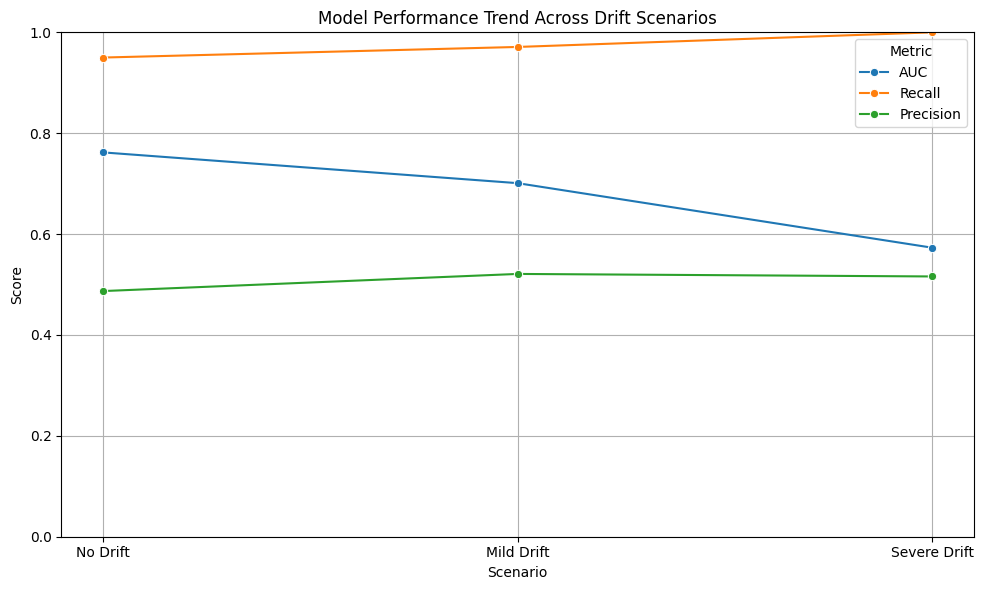

bmi_group
28.1-37.7    0.528634
–28          0.303965
37.8-47.5    0.158590
47.5+        0.008811
Name: proportion, dtype: float64

Model Performance under Different BMI Drift Scenarios:
           Scenario  Samples    AUC  Recall  Precision
0          No Drift      227  0.762   0.950      0.487
1   Healthier Drift      227  0.755   0.919      0.482
2  More Obese Drift      228  0.783   0.981      0.531


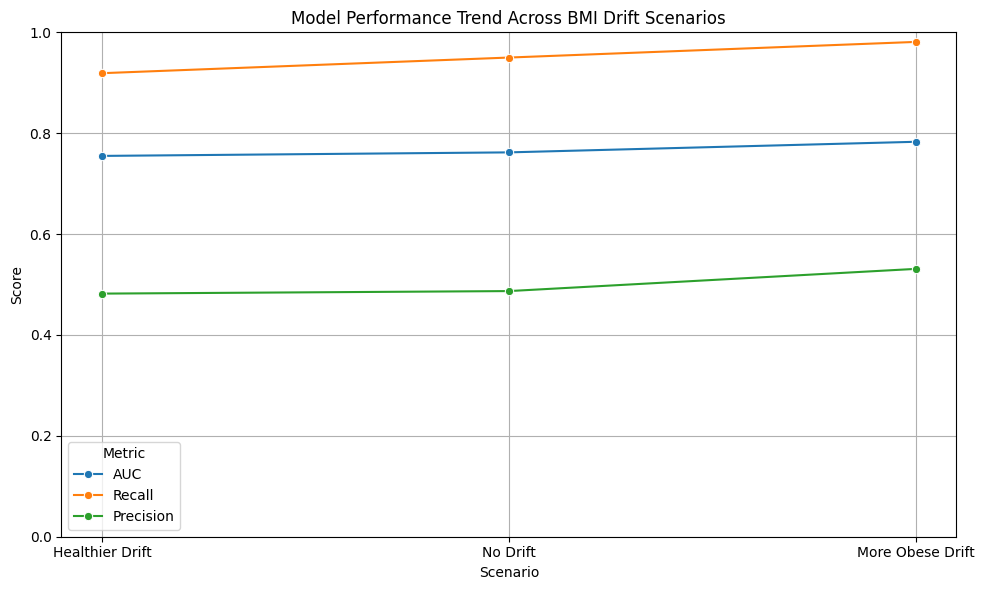

In [40]:
# Remove al previously added columns from X_test and create a copy for drift simulation
X_test = X_test[['BMI', 'Age']]
X_test_drift = X_test.copy()
# Define bins for drifting age groups and label the test examples
bins = [20, 30, 40, 50, 60, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
X_test_drift['age_group'] = pd.cut(X_test_drift['Age'], bins=bins, labels=labels)
# Print original distribution of age groups in the test set (get proportions so it is easier to define drift scenarios)
baseline_dist = X_test_drift['age_group'].value_counts(normalize=True)
print(baseline_dist)

# Define drift scenarios by changing the distribution of age groups
drift_scenarios = {
    'No Drift': baseline_dist,
    'Mild Drift': pd.Series({'20-29': 0.20, '30-39': 0.30, '40-49': 0.25, '50-59': 0.15, '60+': 0.10}),
    'Severe Drift': pd.Series({'20-29': 0.1, '30-39': 0.15, '40-49': 0.25, '50-59': 0.30, '60+': 0.2})
}

# Function to resample the test set according to a given age group distribution
def resample_test_set(X_test, y_test, target_dist):
    
    # Calculate the number of samples needed for each group
    total_samples = len(X_test)
    target_counts = (target_dist * total_samples).round().astype(int)
    
    # Resample each group to match the target counts
    resampled_indices = []
    for group, count in target_counts.items():
        group_indices = X_test[X_test['age_group'] == group].index
        if len(group_indices) == 0:
            continue  # Skip if no samples in this group
        replace = count > len(group_indices)
        sampled_indices = np.random.choice(group_indices, size=count, replace=replace)
        resampled_indices.extend(sampled_indices)
    
    # Create new test set
    X_resampled = X_test.loc[resampled_indices].reset_index(drop=True)
    y_resampled = y_test.loc[resampled_indices].reset_index(drop=True)
    
    return X_resampled, y_resampled
# Evaluate model performance under each drift scenario
results = []
for scenario, target_dist in drift_scenarios.items():
    X_drifted, y_drifted = resample_test_set(X_test_drift, y_test, target_dist)
    
    # Scale the drifted test set
    X_drifted_scaled = scaler.transform(X_drifted[['BMI', 'Age']])
    
    # Predict using the logistic regression model at the chosen threshold
    y_proba = logreg_model.predict_proba(X_drifted_scaled)[:, 1]
    y_pred = (y_proba >= threshold_at_target_recall['logreg']).astype(int)
    
    # Compute metrics
    accuracy = accuracy_score(y_drifted, y_pred)
    recall = recall_score(y_drifted, y_pred)
    precision = precision_score(y_drifted, y_pred)
    auc = roc_auc_score(y_drifted, y_proba)
    
    results.append({
        'Scenario': scenario,
        'Samples': len(y_drifted),
        'AUC': round(auc, 3),
        'Recall': round(recall, 3),
        'Precision': round(precision, 3)
    })
# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("\nModel Performance under Different Drift Scenarios:")
print(results_df)


# Optional: ensure correct order of scenarios
scenario_order = ['No Drift', 'Mild Drift', 'Severe Drift']
results_df['Scenario'] = pd.Categorical(results_df['Scenario'], categories=scenario_order, ordered=True)

# Melt again
metrics_df = results_df.melt(id_vars='Scenario', 
                             value_vars=['AUC', 'Recall', 'Precision'],
                             var_name='Metric', value_name='Score')

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=metrics_df, x='Scenario', y='Score', hue='Metric', marker='o')

plt.title('Model Performance Trend Across Drift Scenarios')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Now do the same for BMI drift
X_test_drift = X_test.copy()
bins = [X_test['BMI'].min(), 28, 37.8, 47.5, X_test['BMI'].max()]
labels = ['–28 ', '28.1-37.7', '37.8-47.5', '47.5+']
X_test_drift['bmi_group'] = pd.cut(X_test_drift['BMI'], bins=bins, labels=labels, include_lowest=True)
# Print original distribution of BMI groups in the test set (get proportions so it is easier to define drift scenarios)
baseline_dist = X_test_drift['bmi_group'].value_counts(normalize=True)
print(baseline_dist)
# Define drift scenarios by changing the distribution of BMI groups
drift_scenarios = {
    'No Drift': baseline_dist,
    'Healthier Drift': pd.Series({'–28 ': 0.5, '28.1-37.7': 0.3, '37.8-47.5': 0.19, '47.5+': 0.01}),
    'More Obese Drift': pd.Series({'–28 ': 0.1, '28.1-37.7': 0.4, '37.8-47.5': 0.4, '47.5+': 0.1})
}

# Function to resample the test set according to a given BMI group distribution
def resample_test_set_bmi(X_test, y_test, target_dist):   
    # Calculate the number of samples needed for each group
    total_samples = len(X_test)
    target_counts = (target_dist * total_samples).round().astype(int)
    
    # Resample each group to match the target counts
    resampled_indices = []
    for group, count in target_counts.items():
        group_indices = X_test[X_test['bmi_group'] == group].index
        if len(group_indices) == 0:
            continue  # Skip if no samples in this group
        replace = count > len(group_indices)
        sampled_indices = np.random.choice(group_indices, size=count, replace=replace)
        resampled_indices.extend(sampled_indices)
    
    # Create new test set
    X_resampled = X_test.loc[resampled_indices].reset_index(drop=True)
    y_resampled = y_test.loc[resampled_indices].reset_index(drop=True)
    
    return X_resampled, y_resampled

# Evaluate model performance under each drift scenario
results = []
for scenario, target_dist in drift_scenarios.items():
    X_drifted, y_drifted = resample_test_set_bmi(X_test_drift, y_test, target_dist)
    
    # Scale the drifted test set
    X_drifted_scaled = scaler.transform(X_drifted[['BMI', 'Age']])
    
    # Predict using the logistic regression model at the chosen threshold
    y_proba = logreg_model.predict_proba(X_drifted_scaled)[:, 1]
    y_pred = (y_proba >= threshold_at_target_recall['logreg']).astype(int)
    
    # Compute metrics
    accuracy = accuracy_score(y_drifted, y_pred)
    recall = recall_score(y_drifted, y_pred)
    precision = precision_score(y_drifted, y_pred)
    auc = roc_auc_score(y_drifted, y_proba)
    
    results.append({
        'Scenario': scenario,
        'Samples': len(y_drifted),
        'AUC': round(auc, 3),
        'Recall': round(recall, 3),
        'Precision': round(precision, 3)
    })
# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("\nModel Performance under Different BMI Drift Scenarios:")
print(results_df)
# Optional: ensure correct order of scenarios
scenario_order = ['Healthier Drift', 'No Drift', 'More Obese Drift']
results_df['Scenario'] = pd.Categorical(results_df['Scenario'], categories=scenario_order, ordered=True)
# Melt again
metrics_df = results_df.melt(id_vars='Scenario', 
                             value_vars=['AUC', 'Recall', 'Precision'],
                             var_name='Metric', value_name='Score')
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=metrics_df, x='Scenario', y='Score', hue='Metric', marker='o')
plt.title('Model Performance Trend Across BMI Drift Scenarios')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations:**  

The drift scenario for age shows what could be expected from the model: As the relative weakness in the recall is in younger age groups, the recall rate will increase further. As we know AUC and Precision are poor anyway, these are not numbers I need to further evaluate. For our purpose, the model is age drift safe. 

Correspondingly, for BMI, the drift scenarios show that if the average BMI is lower ("Healthier Drift") the recall is lower than the target recall of 0.95, while when the mean BMI is higher ("More Obese Drift"), it is higher. It is ultimately a business decision how much recall loss is acceptable. (Just as it is a business decision to set the the arbitrary target recall at 95%.)


## Deployment


<img src="DeploymentDiagram.png" alt="Diabetes Test Recommendation" width="50%">

I would choose to deploy the model on a health kiosk, with software running locally. As these are sensitive data, I would try to avoid sending anything over the internet. The model is small enough to run well on any device, such as an iPad, so that should technically not be an issue.

There needs to be running a UI app where the user enters age and BMI, and where the result is shown. The result needs to be shown in a way that makes it clear that this is not a diabetes test result, but merely a rough test whether an actual test may be advisable. So there must not be any alarming messaging such as checkmark for negative and exclamation mark for "test recommended", as these would be inappropriate. Likewise colour codings like green and red must be avoided for the same reason. There would need to be neutral messaging such as "Based on your input, we recommend to get a test for diabetes.", or "Based on your input, your risk of having diabetes is very low.", respectively. The messaging must reflect both the bad precision for positive results, and the imperfect recall for negative results. 

As for the Prediction/Inference service, I would still keep it separate just for general decoupling reasons. 

Also, the actual model is a separate artifact and can be easily swapped if new training data become available, or better models. 

### 9. Cross-validation and statistical analysis and TabNet

In [41]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

df2 = pd.read_csv('Pima Indians Diabetes Database.csv')
# remove NaN values
df2 = df2.dropna()
# remove rows with BMI of 0
df2 = df2[df2['BMI'] != 0]
# remove outliers for all columns
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

X2 = df2.drop(columns=["Outcome"]).values  # features as NumPy array
y2 = df2["Outcome"].values  

X2_train, X2_valid, y2_train, y2_valid = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

clf = TabNetClassifier()

clf.fit(
    X2_train, y2_train,
    eval_set=[(X2_valid, y2_valid)],
    eval_name=['valid'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


y2_pred = clf.predict(X2_valid)
accuracy = accuracy_score(y2_valid, y2_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
recall = recall_score(y2_valid, y2_pred)
precision = precision_score(y2_valid, y2_pred)
cm = confusion_matrix(y2_valid, y2_pred)
tn, fp, fn, tp = cm.ravel()
# Print recall, precision, cm
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"TN: {tn}, FN: {fn}, TP: {tp}, FP: {fp}")





epoch 0  | loss: 1.0145  | valid_accuracy: 0.60938 |  0:00:00s
epoch 1  | loss: 0.79517 | valid_accuracy: 0.60938 |  0:00:00s
epoch 2  | loss: 0.66195 | valid_accuracy: 0.64844 |  0:00:00s
epoch 3  | loss: 0.58494 | valid_accuracy: 0.47656 |  0:00:00s
epoch 4  | loss: 0.55195 | valid_accuracy: 0.35156 |  0:00:00s


/Users/jus/Documents/Code/ML_Uni_Notebooks/.venv11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 5  | loss: 0.52951 | valid_accuracy: 0.40625 |  0:00:00s
epoch 6  | loss: 0.53265 | valid_accuracy: 0.39844 |  0:00:00s
epoch 7  | loss: 0.50103 | valid_accuracy: 0.44531 |  0:00:00s
epoch 8  | loss: 0.4958  | valid_accuracy: 0.42969 |  0:00:00s
epoch 9  | loss: 0.47885 | valid_accuracy: 0.40625 |  0:00:00s
epoch 10 | loss: 0.45769 | valid_accuracy: 0.4375  |  0:00:00s
epoch 11 | loss: 0.46325 | valid_accuracy: 0.39844 |  0:00:00s
epoch 12 | loss: 0.45931 | valid_accuracy: 0.42188 |  0:00:00s

Early stopping occurred at epoch 12 with best_epoch = 2 and best_valid_accuracy = 0.64844
Validation Accuracy: 0.6484
Recall: 0.175
Precision: 0.368
TN: 76, FN: 33, TP: 7, FP: 12


/Users/jus/Documents/Code/ML_Uni_Notebooks/.venv11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


**Observations:**  

I feel I covered CV this time in order to find the best parameters and models.

For statistics, I hope the Recall vs. Threshold plots count. (I'm not sure what else may be asked here.)

As for TabNet, I just got it to work on all variables as features. I'm not sure what else the expectation is. 
